In [1005]:
import numpy as np
import pandas as pd

In [1006]:
df = pd.read_csv("car_fuel_efficiency.csv")
df.head()


,engine_displacement,num_cylinders,horsepower,vehicle_weight,acceleration,model_year,origin,fuel_type,drivetrain,num_doors,fuel_efficiency_mpg
0,170,3.0,159.0,3413.433759,17.7,2003,Europe,Gasoline,All-wheel drive,0.0,13.231729
1,130,5.0,97.0,3149.664934,17.8,2007,USA,Gasoline,Front-wheel drive,0.0,13.688217
2,170,NaN,78.0,3079.038997,15.1,2018,Europe,Gasoline,Front-wheel drive,0.0,14.246341
3,220,4.0,NaN,2542.392402,20.2,2009,USA,Diesel,All-wheel drive,2.0,16.912736
4,210,1.0,140.0,3460.870990,14.4,2009,Europe,Gasoline,All-wheel drive,2.0,12.488369


In [1007]:
df = df[['engine_displacement', 'horsepower', 'vehicle_weight', 'model_year', 'fuel_efficiency_mpg']]
df

,engine_displacement,horsepower,vehicle_weight,model_year,fuel_efficiency_mpg
0,170,159.0,3413.433759,2003,13.231729
1,130,97.0,3149.664934,2007,13.688217
2,170,78.0,3079.038997,2018,14.246341
3,220,NaN,2542.392402,2009,16.912736
4,210,140.0,3460.870990,2009,12.488369
...,...,...,...,...,...
9699,140,164.0,2981.107371,2013,15.101802
9700,180,154.0,2439.525729,2004,17.962326
9701,220,138.0,2583.471318,2008,17.186587
9702,230,177.0,2905.527390,2011,15.331551


In [1008]:
import matplotlib as plt
import seaborn as sns

<Axes: xlabel='fuel_efficiency_mpg', ylabel='Count'>

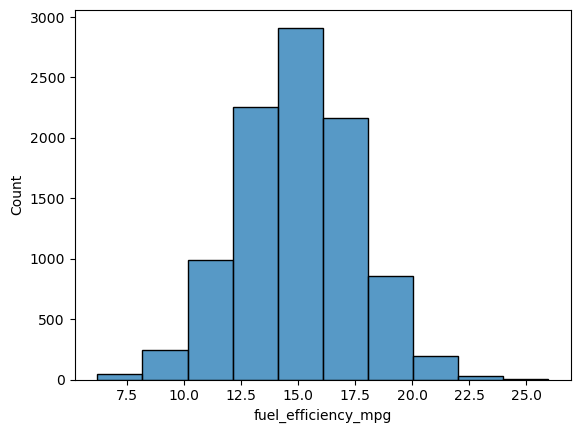

In [1009]:
sns.histplot(df.fuel_efficiency_mpg, bins=10)

In [1010]:
df.isnull().sum()

engine_displacement      0
horsepower             708
vehicle_weight           0
model_year               0
fuel_efficiency_mpg      0
dtype: int64

In [1011]:
df['horsepower'].median()

149.0

In [1012]:
df['horsepower'].fillna(0).median()

146.0

In [1013]:
n = len(df)

n_val = int(n * 0.2)
n_test = int(n * 0.2)
n_train = n - n_val - n_test
n_val, n_test, n_train


(1940, 1940, 5824)

In [1014]:
idx = np.arange(n)
np.random.seed(42)
np.random.shuffle(idx)

In [1015]:
idx_train = idx[:n_train]
idx_val = idx[n_train:n_train + n_val]
idx_test = idx[n_train + n_val:]

In [1016]:
features = ['engine_displacement','horsepower','vehicle_weight','model_year']

x_train = df[features].iloc[idx_train]
x_train = x_train.reset_index(drop=True)
y_train = df['fuel_efficiency_mpg'].iloc[idx_train]

x_val = df[features].iloc[idx_val]
x_val = x_val.reset_index(drop=True)
y_val = df['fuel_efficiency_mpg'].iloc[idx_val]

x_test = df[features].iloc[idx_test]
x_test = x_test.reset_index(drop=True)
y_test = df['fuel_efficiency_mpg'].iloc[idx_test]

In [1017]:
def train_linear_regression(x, y):
    ones = np.ones((x.shape[0], 1))
    x = np.column_stack((ones, x))
    XTX = x.T.dot(x)
    XTX_inv = np.linalg.inv(XTX)
    w_full = XTX_inv.dot(x.T).dot(y)
    return w_full[0], w_full[1:]

In [1018]:
x_train_zeros = x_train.fillna(0)

x_train_means = x_train.fillna(x_train.mean())

In [1019]:
w0, w_zeros = train_linear_regression(x_train_zeros, y_train)

In [1020]:
y_zeros_pred = w0 + x_train.dot(w_zeros)

<Axes: xlabel='fuel_efficiency_mpg', ylabel='Count'>

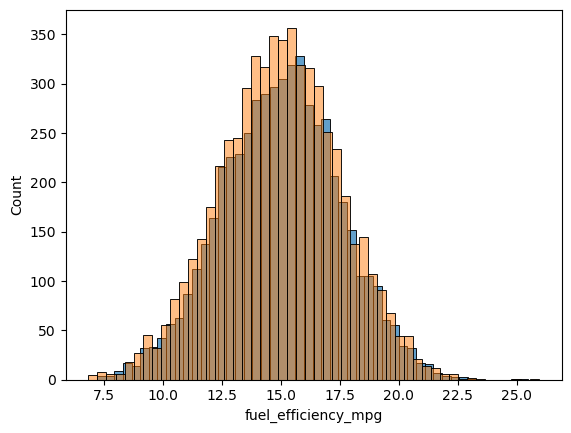

In [1021]:
sns.histplot(y_zeros_pred, alpha=0.7, bins=50)

sns.histplot(y_train, alpha=0.5, bins=50)


In [1022]:
w0, w_means = train_linear_regression(x_train_means, y_train)

In [1023]:
y_means_pred = w0 + x_train.dot(w_means)

<Axes: xlabel='fuel_efficiency_mpg', ylabel='Count'>

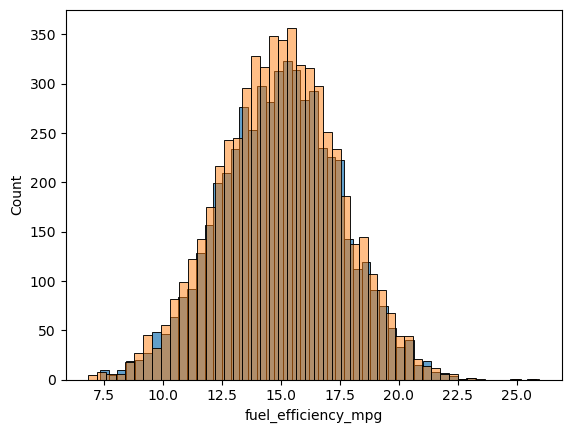

In [1024]:
sns.histplot(y_means_pred, alpha=0.7, bins=50)

sns.histplot(y_train, alpha=0.5, bins=50)

In [1025]:
def rmse(y, y_pred):
    error = y - y_pred
    se = error ** 2
    mse = se.mean()
    return np.sqrt(mse)

In [1026]:
rmse(y_train, y_zeros_pred)

3.5821800291427888

In [1027]:
x_val_zeros = x_val.fillna(0)

x_val_means = x_val.fillna(x_val.mean())

In [1028]:
w0v, wv_zeros = train_linear_regression(x_val_zeros, y_val)

In [1029]:
w0v

23.64337160690703

In [1030]:
wv_zeros

array([ 0.00012134,  0.0039501 , -0.00501541,  0.00289231])

In [1031]:
y_zero_pred_val = w0 + x_val.dot(wv_zeros)

In [ ]:
rmse(y_val, y_zero_pred_val)

6.766613302763747